# Amazon Sentiment Analysis Challenge
For this challenge the goal is to create a classifer model for online reviews, ie. positive or negative. The data is sourced from https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences and the model will be built off of amazon reviews. 

## Import the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from wordcloud import WordCloud

%matplotlib inline

In [2]:
# Import the data delimiter based on tabs
df = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)

# Rename columns note Type 1 = Positive Type 2 = Negative
df.columns = ['Review', 'Type']
df.head()

,Review,Type
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
df['Type'] = (df['Type']==1)

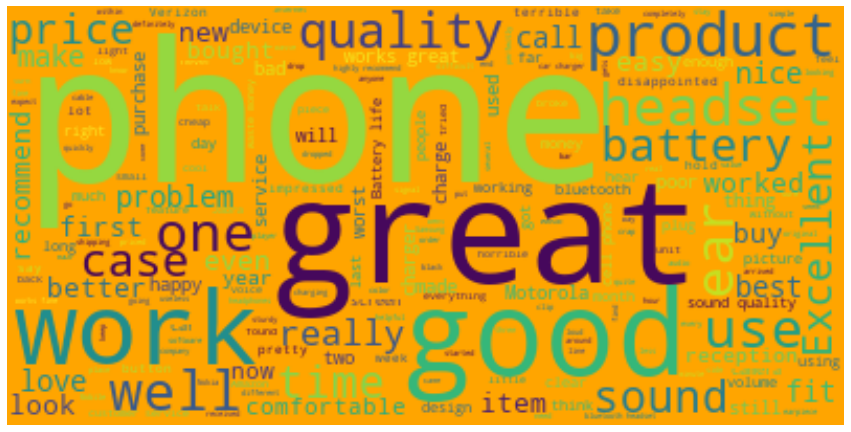

In [4]:
# Create a Word Cloud image
wordcloud = WordCloud(background_color='orange').generate(''.join(df['Review']))
plt.figure(figsize=(15, 10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

#### Word Cloud Analysis
Looking at the word cloud above the most common identifiable words were positive words. Knowing that the distribution was split 50 - 50 between positive and negative reviews it was simplier to implement a model based on positive reviews. The most common positive words were great, good, and well. 

In [5]:
# create filter for positive words
keywords = ['good', 'great', 'happy', 'love', 'best',
            'excellent', 'comfortable', 'highly recommend', 
            'must have', 'very impressed']

#create new boolean columns based on those words
for key in keywords:
        df[str(key)] = df['Review'].str.contains(
            str(key), case=False)
        

#### Independence of Variables
The correlation plot below shows the independence of each variable. For the Naive Bayes models the varibles need to be independent of on another. This plot will help identify any issues. 

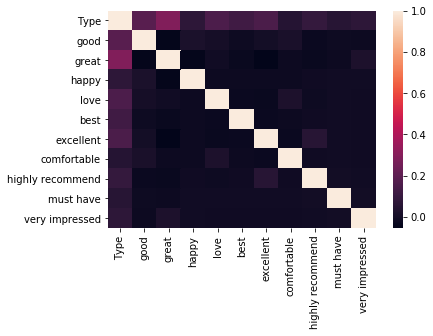

In [6]:
sns.heatmap(df.corr())
plt.show()

In [7]:
# Create and data and target group
data = df[keywords]
target = df['Type']

from sklearn.naive_bayes import BernoulliNB


bnb = BernoulliNB()
bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))


Number of mislabeled points out of a total 1000 points : 283


As noted above the model correctly identified 72% review types. Lets see how this model performs with other websites. 

## Model Success on Other Websites
The model will be run with yelp and imdb reviews to see how it performs.

In [8]:
# Import the data delimiter based on tabs
df_yelp = pd.read_csv('yelp_labelled.txt', sep='\t', header=None)

# Rename columns note Type 1 = Positive Type 2 = Negative
df_yelp.columns = ['Review', 'Type']
df_yelp['Type'] = (df_yelp['Type']==1)
df_yelp.head()

,Review,Type
0,Wow... Loved this place.,True
1,Crust is not good.,False
2,Not tasty and the texture was just nasty.,False
3,Stopped by during the late May bank holiday of...,True
4,The selection on the menu was great and so wer...,True


In [9]:
for key in keywords:
        df_yelp[str(key)] = df_yelp['Review'].str.contains(
            str(key), case=False)

data = df_yelp[keywords]
target = df_yelp['Type']

bnb = BernoulliNB()
bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 341


#### Yelp Analysis
As seen above the model predicted 66% of yelp reviews correctly. The biggest factor for the change is the product and service offered by yelp. The yelp reviews were for a resturant while amazon reviews were for a phone. 

In [10]:
# Import the data delimiter based on tabs
df_imbd = pd.read_csv('imdb_labelled.txt', sep='\t', header=None)

# Rename columns note Type 1 = Positive Type 2 = Negative
df_imbd.columns = ['Review', 'Type']
df_imbd['Type'] = (df_imbd['Type']==1)
df_imbd.head()

,Review,Type
0,"A very, very, very slow-moving, aimless movie ...",False
1,Not sure who was more lost - the flat characte...,False
2,Attempting artiness with black & white and cle...,False
3,Very little music or anything to speak of.,False
4,The best scene in the movie was when Gerardo i...,True


In [11]:
for key in keywords:
        df_imbd[str(key)] = df_imbd['Review'].str.contains(
            str(key), case=False)
        
data = df_imbd[keywords]
target = df_imbd['Type']

bnb = BernoulliNB()
bnb.fit(data, target)

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 311


#### IMDB Analysis
The model performed the worst for imdb. Two factors contributed to this. One the review genre was movies, which is different from phones. Two, the reviews for imdb were more eloquent so the simplicity of the model would fit as well. 